In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:

file_path = '/content/drive/MyDrive/ENS_491_P1.xlsx'


xls = pd.ExcelFile(file_path)


print(xls.sheet_names)


df = pd.read_excel(file_path, sheet_name=xls.sheet_names[0])
print(df.head())


['Sheet1']
     X1  X2  X3     Y1
0  0.01  10   25   193
1  0.01  10   50   380
2  0.01  10  100  1120
3  0.01  30   25   223
4  0.01  30   50   410


In [ ]:

print(df.info())


print(df.isnull().sum())


df = df.dropna()



print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      45 non-null     float64
 1   X2      45 non-null     int64  
 2   X3      45 non-null     int64  
 3   Y1      45 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.5 KB
None
X1     0
X2     0
X3     0
Y1     0
dtype: int64
              X1         X2         X3            Y1
count  45.000000  45.000000   45.000000    45.000000
mean    0.050000  30.000000   58.333333   600.711111
std     0.028604  16.514456   31.532811   410.605242
min     0.010000  10.000000   25.000000   183.000000
25%     0.030000  10.000000   25.000000   263.000000
50%     0.050000  30.000000   50.000000   410.000000
75%     0.070000  50.000000  100.000000  1120.000000
max     0.090000  50.000000  100.000000  1211.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler


X = df.iloc[:, :-1]
y = df.iloc[:, -1]


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


print(X_scaled[:5])


[[0.         0.         0.        ]
 [0.         0.         0.33333333]
 [0.         0.         1.        ]
 [0.         0.5        0.        ]
 [0.         0.5        0.33333333]]


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (38, 3)
Test set size: (7, 3)


##Random Forest Trainig

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest model trained.")


Random Forest model trained.


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
ame_rf = mean_absolute_error(y_test, y_test_pred)
rmse_rf = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Random Forest - R² (Train): {r2_train:.2f}, R² (Test): {r2_test:.2f}")
print(f"AME: {ame_rf:.2f}, RMSE: {rmse_rf:.2f}")


Random Forest - R² (Train): 1.00, R² (Test): 1.00
AME: 15.08, RMSE: 20.12


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##LSBoost (Gradient Boosting) Trainig


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


ls_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
ls_model.fit(X_train, y_train)

print("LSBoost model trained.")


LSBoost model trained.


In [ ]:

y_train_pred_ls = ls_model.predict(X_train)
y_test_pred_ls = ls_model.predict(X_test)


r2_train_ls = r2_score(y_train, y_train_pred_ls)
r2_test_ls = r2_score(y_test, y_test_pred_ls)
ame_ls = mean_absolute_error(y_test, y_test_pred_ls)
rmse_ls = mean_squared_error(y_test, y_test_pred_ls, squared=False)

print(f"LSBoost - R² (Train): {r2_train_ls:.2f}, R² (Test): {r2_test_ls:.2f}")
print(f"AME: {ame_ls:.2f}, RMSE: {rmse_ls:.2f}")


LSBoost - R² (Train): 1.00, R² (Test): 1.00
AME: 12.70, RMSE: 17.49


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


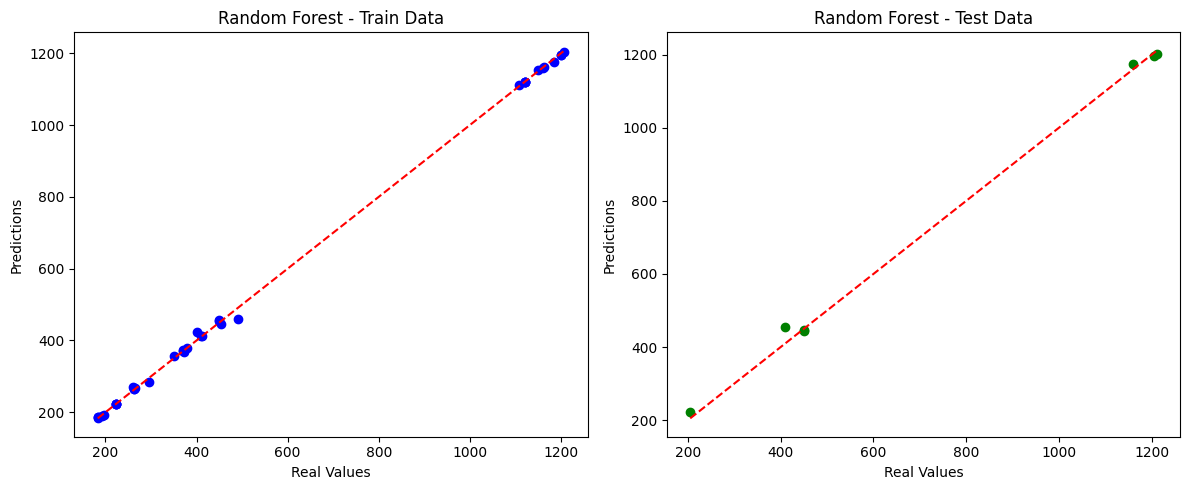

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, label='Train', color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Random Forest - Train Data')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, label='Test', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Random Forest - Test Data')

plt.tight_layout()
plt.show()


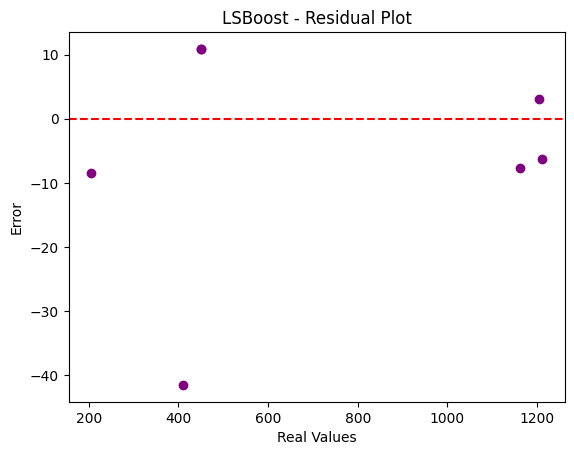

In [ ]:

residuals_ls = y_test - y_test_pred_ls
plt.scatter(y_test, residuals_ls, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Real Values')
plt.ylabel('Error')
plt.title('LSBoost - Residual Plot')
plt.show()


In [ ]:

data = {
    'Model': ['Random Forest', 'LSBoost'],
    'R² (Train)': [r2_train, r2_train_ls],
    'R² (Test)': [r2_test, r2_test_ls],
    'AME': [ame_rf, ame_ls],
    'RMSE': [rmse_rf, rmse_ls]
}

df_results = pd.DataFrame(data)
print(df_results)


           Model  R² (Train)  R² (Test)        AME       RMSE
0  Random Forest    0.999636   0.997592  15.078571  20.121620
1        LSBoost    0.999569   0.998180  12.703682  17.494185


LSBoost modeli, test verisinde daha yüksek doğruluk ve daha düşük hatalar gösterdiği için daha iyi bir model olarak değerlendirilebilir.
Ayrıca LSBoost, hem eğitim hem de test verilerinde tutarlı bir performans sergileyerek overfitting'den kaçınmış gibi görünüyor.